In [3]:
import os
import tempfile
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
plt.rc('text', usetex=True)


def trim(im):
    """
    Crops `useless` empty space (transparency), of a gives Image
    to reduce its size to the smallest needed area.

    Parameters
    ----------
    im: PIL.Image
        Input image which should be cropped.

    Returns
    -------
    croped_im: PIL.Image
        Image with cropped empty space, reducing its size.

    """
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)


def tex2png(tex_expression, filename, font_size=20, dpi=300):
    """
    Function to generate png images from latex expressions,
    using matplitlibs latex support.

    Parameters
    ----------
    tex_expression: str
        This can be any given Latex expression like,
        $\int\limits_{0}^{\infty} f(x) \, \mathrm{d} x$

    filename: str
        Path to the file that should be generated.

    font_size: int
        Fontsize to be used.

    dpi: int
        Pointdesity of the image that should be generated.

    Returns
    -------
    croped_im: PIL.Image
        Image of the latex expression, where empty space sorounding it
        is cropped away

    Notes
    -----
    If parts of the expression aren't shown or pixelated, try to play around with
    font_size and dpi
    """
    fig, ax = plt.subplots()
    ax.text(0, 0, tex_expression, size=font_size)
    ax.axis('off')
    temp_file = tempfile.NamedTemporaryFile()
    temp_file.close()
    fig.savefig(temp_file.name, dpi=dpi, transparent=True, format="png",
                bbox_inches='tight', pad_inches=0.0)
    plt.close()
    bg = Image.open(temp_file.name)
    croped_im = trim(bg)
    croped_im.save(filename, format="png")
    os.remove(temp_file.name)
    return croped_im


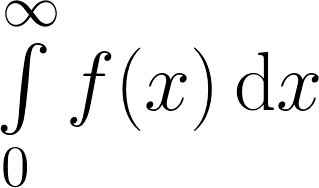

In [4]:
tex2png(r"$\int\limits_{0}^{\infty} f(x) \, \mathrm{d} x$", "test_img.png")